# Introduction to Machine Learning

## High School of Digital Culture

## Additional Materials to Module 3. Logistic Regression

Data processing

In [98]:
#Data reading; unique names of candies will be indexes
import pandas as pd
DATA = pd.read_csv("LogReg/candy-data.csv", delimiter=',', index_col='competitorname')

In [75]:
#Feeding the model with data (except for some candies)
train_data = DATA.drop(['Kit Kat','Milk Duds','Snickers'])

In [76]:
#Selecting the data for predictors and deleting the two last columns. The indexes are not included in the data
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [77]:
#Selecting the response column
y = pd.DataFrame(train_data['Y'])

Logistic regression model training

In [78]:
#Connecting the logistic regression model from sklearn library
from sklearn.linear_model import LogisticRegression

In [79]:
#Model training
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Prediction for the candies using the trained model

In [80]:
#Prediction for the candies entered manually, probabilities are given for classes 0 and 1 respectively
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

array([[0.16799677, 0.83200323]])

In [81]:
#Prediction for the candies from the table

#Selecting the row from the table
AirHeads = DATA.loc['Air Heads',:].to_frame().T

#Selecting the data for predictors and predicting using the model
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0])

Evaluation of the model using test data

In [82]:
#Selecting the data for predictors
test_data = pd.read_csv("LogReg/candy-test.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [83]:
#Prediction for the candies, the default cutoff threshold is 0.5
Y_pred = reg.predict(X_test)

In [84]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [85]:
#Probabilities of assigning test data objects to class 0 and class 1, respectively
Y_pred_probs = reg.predict_proba(X_test)

In [86]:
Y_pred_probs

array([[0.7463886 , 0.2536114 ],
       [0.66394353, 0.33605647],
       [0.65905248, 0.34094752],
       [0.61444046, 0.38555954],
       [0.25856841, 0.74143159],
       [0.33190166, 0.66809834],
       [0.35761915, 0.64238085],
       [0.23332949, 0.76667051],
       [0.65101769, 0.34898231],
       [0.58325933, 0.41674067],
       [0.65075529, 0.34924471],
       [0.85787522, 0.14212478],
       [0.65172109, 0.34827891],
       [0.50199958, 0.49800042],
       [0.27232788, 0.72767212]])

In [87]:
#Selection of probabilities of classifying objects to class 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [88]:
Y_pred_probs_class_1

array([0.2536114 , 0.33605647, 0.34094752, 0.38555954, 0.74143159,
       0.66809834, 0.64238085, 0.76667051, 0.34898231, 0.41674067,
       0.34924471, 0.14212478, 0.34827891, 0.49800042, 0.72767212])

In [89]:
#Selecting the response column
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [90]:
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [91]:
#Connecting the metrics from sklearn library
from sklearn import metrics

In [92]:
#calculate FPR, TPR
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [93]:
#calculate AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [94]:
#calculation Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [95]:
#calculation Precision
metrics.precision_score(Y_true, Y_pred)

0.6

In [96]:
#enabling libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

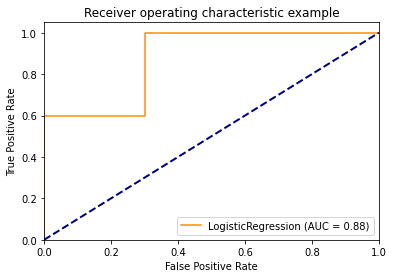

In [97]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()